In [18]:
#positive or negative review based on words
from keras.datasets import imdb

In [2]:
# using top 10,000 most frequently occuring words in training data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
# train_data is a list of reviews, where each review is a list of word indices
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
# train_labels are a list of 0s and 1s, where 0 is negative and 1 is positive
train_labels[0]

1

In [5]:
# decoding reviews
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])    # indices are offset by 3

In [6]:
# encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))   # creates an all-zero matrix
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.   # sets specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)   # vectorized data
x_test = vectorize_sequences(test_data)
        

In [7]:
# vectorizing labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Buiding a network

In [8]:
from keras import models
from keras import layers

In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))  # Dense - fully connected, 16 nodes
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))  # relu - rectified linear unit
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # sigmoid activation outputs probability of positive review 

In [10]:
# setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
'''# training your model 
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])'''
# compiling the model using crossentropy loss, which is the best for models that output probabilities

# custom losses and metrics
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,     # 5 iterations over all samples
                    batch_size=512,  # 512 samples
                    validation_data=(x_val, y_val))   # to monitor loss and accuracy               

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 4s 261us/step - loss: 0.6325 - binary_accuracy: 0.6421 - val_loss: 0.5400 - val_binary_accuracy: 0.8451
Epoch 2/5
15000/15000 [==============================] - 2s 129us/step - loss: 0.5283 - binary_accuracy: 0.7574 - val_loss: 0.4458 - val_binary_accuracy: 0.8540
Epoch 3/5
15000/15000 [==============================] - 2s 122us/step - loss: 0.4571 - binary_accuracy: 0.8133 - val_loss: 0.3728 - val_binary_accuracy: 0.8813
Epoch 4/5
15000/15000 [==============================] - 2s 123us/step - loss: 0.3981 - binary_accuracy: 0.8555 - val_loss: 0.3730 - val_binary_accuracy: 0.8594
Epoch 5/5
15000/15000 [==============================] - 2s 132us/step - loss: 0.3507 - binary_accuracy: 0.8814 - val_loss: 0.3126 - val_binary_accuracy: 0.8879


In [12]:
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 2s 92us/step


[0.32349105006217954, 0.88236]

In [13]:
# checking the history
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

Plotting the training and validation loss

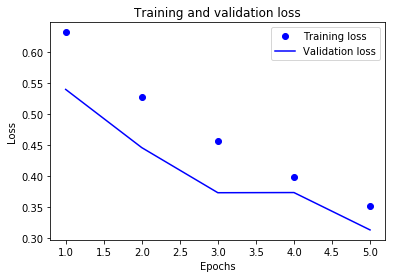

In [17]:
import matplotlib.pyplot as plt

#history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting the training and validation accuracy

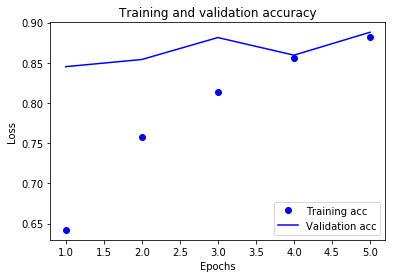

In [15]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Validation loss and accuracy show overfitting.

In [16]:
# generating the likelihood of reviews
model.predict(x_test)

array([[0.3065728 ],
       [0.99897015],
       [0.9803269 ],
       ...,
       [0.20968735],
       [0.2801483 ],
       [0.45317483]], dtype=float32)